In [1]:
# Importando os modulos
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('dataset_treino.csv', parse_dates = ['first_active_month'])
test = pd.read_csv('dataset_teste.csv', parse_dates = ['first_active_month'])
trans_hist = pd.read_csv('transacoes_historicas.csv')
comerc = pd.read_csv('comerciantes.csv')
print("Numero de linhas e colunas no dataset de treino : ",train.shape)
print("Numero de linhas e colunas no dataset de test : ",test.shape)
print("Numero de linhas e colunas no dataset de treino : ",trans_hist.shape)
print("Numero de linhas e colunas no dataset de treino : ",comerc.shape)

Numero de linhas e colunas no dataset de treino :  (201917, 6)
Numero de linhas e colunas no dataset de test :  (123623, 5)
Numero de linhas e colunas no dataset de treino :  (29112361, 14)
Numero de linhas e colunas no dataset de treino :  (334696, 22)


In [3]:
# Verificando os primeiros registros
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
test.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [5]:
trans_hist.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
comerc.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [7]:
train.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

In [8]:
test.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
dtype: object

In [9]:
trans_hist.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


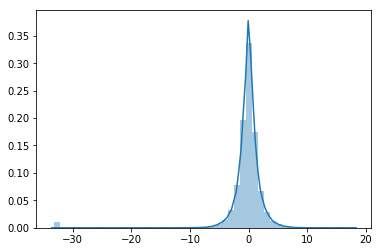

In [10]:
# Vamos dar uma olhada graficamente nas distribuição das variáveis do conjunto de treino
# Notamos que a valores extremos(outliers).A métrica RMSE é sensível a estes pontos. 
# Recomendo que os outliers sejam investigados e não excluidos.
sns.distplot(train['target'].values)

In [11]:
# Há 2207 linhas com valores extremos. Os famosos outliers. Tem que ficar esperto com eles.
(train['target']<-30).sum()

2207

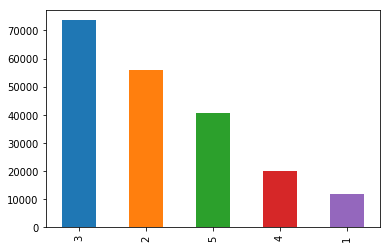

In [12]:
# Vamos verificar os valores das outras variáveis
train['feature_1'].value_counts().plot.bar()

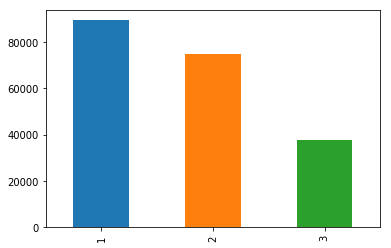

In [13]:
train['feature_2'].value_counts().plot.bar()

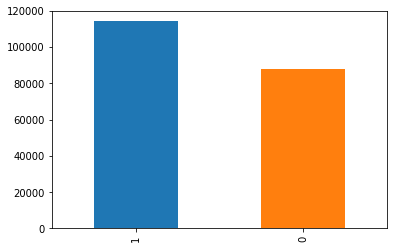

In [14]:
train['feature_3'].value_counts().plot.bar()

TypeError: 'module' object is not callable

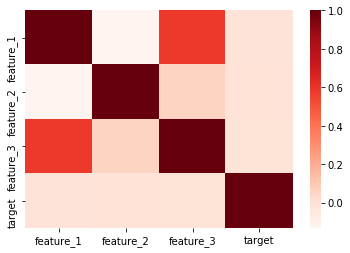

In [16]:
# Agora vamos utilizar a correlação de Pearson para verificar a correlação entre as variáveis.
import matplotlib as plt
corr = train.corr()
sns.heatmap(corr, cmap = plt.cm.Reds)
plt.figure(figsize = (12, 10))
plt.show()

In [17]:
# A correlação entre as variáveis com a target é muito baixa. É por isso que os outros datasets
# sugeridos tem muita importancia. Pois, as variáveis deles podem ter maior poder preditor
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


In [18]:
# Defini função para verificar valores missing e o percentual para o dataset 
def missing_values(train):
    total = train.isnull().sum().sort_values(ascending = False)
    percentual = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])

In [19]:
# Verificando os valores missing para cada dataset. Podemos verificar que não há dados missing no treino
missing_values(train)

,Total,Percentual
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [20]:
# Pouquissimos dados missing no dataset de test(possivelmente desconsiderarei isso)
missing_values(test)

,Total,Percentual
first_active_month,1,0.000809
feature_3,0,0.000000
feature_2,0,0.000000
feature_1,0,0.000000
card_id,0,0.000000


In [21]:
# Aqui há algumas variáveis com bastante dados missing, mas não tratarei isso agora, pois talvez estas 
# variáveis não façam  parte para o estudo.
missing_values(trans_hist)

,Total,Percentual
category_2,2652864,9.112500
category_3,178159,0.611970
merchant_id,138481,0.475678
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


In [23]:
# Vamos fazer um uniao dos datasets, pois a coluna 'purchase _amount', já que possui a quantidade
# compra por id. E como precisamos de mais dados históricos para o modelo é esta uma boa variável 
agreg = trans_hist.groupby('card_id')
agreg = agreg['purchase_amount'].size().reset_index()
agreg.columns = ['card_id', 'num_hist_transacoes']
train = pd.merge(train, agreg, on = 'card_id', how = 'left')
test = pd.merge(test, agreg, on = 'card_id', how = 'left')

           card_id  purchase_amount
0  C_ID_00007093c1              149
1  C_ID_0001238066              123
2  C_ID_0001506ef0               66
3  C_ID_0001793786              216
4  C_ID_000183fdda              144


In [33]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transacoes
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133


In [34]:
train.dtypes

first_active_month     datetime64[ns]
card_id                        object
feature_1                       int64
feature_2                       int64
feature_3                       int64
target                        float64
num_hist_transacoes             int64
dtype: object

In [35]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,num_hist_transacoes
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78
2,2017-08-01,C_ID_b709037bc5,5,1,1,13
3,2017-12-01,C_ID_d27d835a9f,2,1,0,26
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,110


In [36]:
# Agora vamos criar novas features com dados estatisticos para a variável purchase amount
agreg = trans_hist.groupby('card_id')
agreg = agreg['purchase_amount'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
agreg.columns = ['card_id', 'soma_hist', 'media_hist', 'desvio_hist', 'min_hist', 'max_hist']
train = pd.merge(train, agreg, on = 'card_id', how = 'left')
test = pd.merge(test, agreg, on = 'card_id', how = 'left')

In [37]:
# Verificando a criação das colunas
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transacoes,soma_hist,media_hist,desvio_hist,min_hist,max_hist
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,-165.968739,-0.638341,0.212139,-0.739395,2.258395
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,-210.006336,-0.600018,0.384967,-0.742400,4.630299
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,-29.167391,-0.678311,0.087380,-0.730138,-0.145847
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,-49.491364,-0.642745,0.261624,-0.740897,1.445596
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,-48.687656,-0.366073,1.352094,-0.746156,7.193041


In [41]:
# No dataset de 'novos comerciantes' também há a variável 'purchase_amount', portanto vou repetir
# o mesmo procedimento feito acima.
novos = pd.read_csv('novas_transacoes_comerciantes.csv')

In [42]:
# Verificando os registros
novos.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


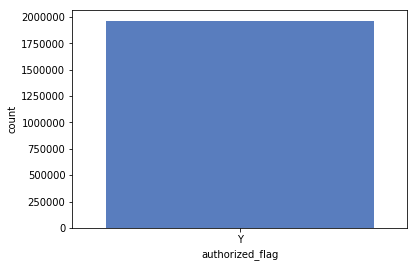

In [44]:
# Verificando se a coluna abaixo possui mais que 1 classe, pois poderia ser um problema caso tivesse
# YEs e No
sns.countplot(x = 'authorized_flag', data = novos, orient = 'vertical', palette = 'muted')

In [47]:
agreg = novos.groupby('card_id')# agrupa por card_id
agreg = agreg['purchase_amount'].size().reset_index()# indice pela coluna
agreg.columns = ['card_id', 'novas_transacoes_comerciantes.csv']# informa a coluna e o dataset
train = pd.merge(train, agreg, on = 'card_id', how = 'left') # uni pela coluna id, left adiciona
# na ultima posição
test = pd.merge(test, agreg, on = 'card_id', how = 'left')

In [48]:
agreg = novos.groupby('card_id')
agreg = agreg['purchase_amount'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
agreg.columns = ['card_id', 'soma_comerc', 'media_comerc', 'desvio_comerc', 'min_comerc', 'max_comerc']
train = pd.merge(train, agreg, on = 'card_id', how = 'left')
test = pd.merge(test, agreg, on = 'card_id', how = 'left')

In [49]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transacoes,soma_hist,media_hist,desvio_hist,min_hist,max_hist,novas_transacoes_comerciantes.csv,soma_comerc,media_comerc,desvio_comerc,min_comerc,max_comerc
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,-165.968739,-0.638341,0.212139,-0.739395,2.258395,23.0,-13.244202,-0.575835,0.135812,-0.724368,-0.296112
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,-210.006336,-0.600018,0.384967,-0.742400,4.630299,6.0,-4.355735,-0.725956,0.014326,-0.739410,-0.701858
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,-29.167391,-0.678311,0.087380,-0.730138,-0.145847,1.0,-0.700326,-0.700326,NaN,-0.700326,-0.700326
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,-49.491364,-0.642745,0.261624,-0.740897,1.445596,7.0,-4.654372,-0.664910,0.065882,-0.734135,-0.566740
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,-48.687656,-0.366073,1.352094,-0.746156,7.193041,36.0,-19.926237,-0.553507,0.223821,-0.739395,0.450886


In [ ]:
# Agora que criamos novas variáveis, eu poderia rodar um modelo com todas elas, mas ainda é possível 
# que existe forte correlação entre as próprias variáveis(colineares)Vamos verificar isso.

TypeError: 'module' object is not callable

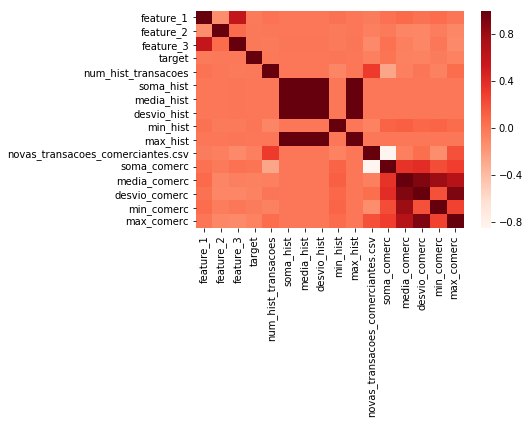

In [50]:
# A linha escura tracejada na diagonal equivale a correlação da variavel com ela mesmo. Note que
# existem vários pontos com a mesma cor.
corr = train.corr()
sns.heatmap(corr, cmap = plt.cm.Reds)
plt.figure(figsize = (12, 10))
plt.show()

In [52]:
# Preparação dos Dados. Criando colunas de Ano, Mes e dia da semana
for x in [train, test]:
    x['year'] = x['first_active_month'].dt.year
    x['month'] = x['first_active_month'].dt.month
    x['dayofweek'] = x['first_active_month'].dt.dayofweek

In [53]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transacoes,soma_hist,media_hist,desvio_hist,...,max_hist,novas_transacoes_comerciantes.csv,soma_comerc,media_comerc,desvio_comerc,min_comerc,max_comerc,year,month,dayofweek
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,-165.968739,-0.638341,0.212139,...,2.258395,23.0,-13.244202,-0.575835,0.135812,-0.724368,-0.296112,2017,6,3
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,-210.006336,-0.600018,0.384967,...,4.630299,6.0,-4.355735,-0.725956,0.014326,-0.739410,-0.701858,2017,1,6
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,-29.167391,-0.678311,0.087380,...,-0.145847,1.0,-0.700326,-0.700326,NaN,-0.700326,-0.700326,2016,8,0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,-49.491364,-0.642745,0.261624,...,1.445596,7.0,-4.654372,-0.664910,0.065882,-0.734135,-0.566740,2017,9,4
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,-48.687656,-0.366073,1.352094,...,7.193041,36.0,-19.926237,-0.553507,0.223821,-0.739395,0.450886,2017,11,2


In [57]:
train.dtypes

first_active_month                   datetime64[ns]
card_id                                      object
feature_1                                     int64
feature_2                                     int64
feature_3                                     int64
target                                      float64
num_hist_transacoes                           int64
soma_hist                                   float64
media_hist                                  float64
desvio_hist                                 float64
min_hist                                    float64
max_hist                                    float64
novas_transacoes_comerciantes.csv           float64
soma_comerc                                 float64
media_comerc                                float64
desvio_comerc                               float64
min_comerc                                  float64
max_comerc                                  float64
year                                          int64
month       

In [54]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,num_hist_transacoes,soma_hist,media_hist,desvio_hist,min_hist,max_hist,novas_transacoes_comerciantes.csv,soma_comerc,media_comerc,desvio_comerc,min_comerc,max_comerc,year,month,dayofweek
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68,-40.733733,-0.599025,0.192268,-0.743902,0.235676,3.0,-1.777156,-0.592385,0.182843,-0.722114,-0.383266,2017.0,4.0,5.0
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78,-49.136513,-0.629955,0.154999,-0.731881,0.318817,9.0,-5.944698,-0.660522,0.071147,-0.740897,-0.506484,2017.0,1.0,6.0
2,2017-08-01,C_ID_b709037bc5,5,1,1,13,4.528840,0.348372,0.906547,-0.536537,2.525866,2.0,0.180138,0.090069,1.151788,-0.724368,0.904506,2017.0,8.0,1.0
3,2017-12-01,C_ID_d27d835a9f,2,1,0,26,-13.690715,-0.526566,0.219162,-0.731881,0.087965,10.0,-5.743674,-0.574367,0.073166,-0.671775,-0.447880,2017.0,12.0,4.0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,110,25.139384,0.228540,2.777764,-0.746758,15.782255,6.0,12.064997,2.010833,6.028671,-0.704082,14.279604,2015.0,12.0,1.0


In [55]:
# Colocando em escala
from sklearn.preprocessing import StandardScaler
X = train.iloc[:, 2:20]
Y = train.iloc[:,5]

scala = StandardScaler().fit(X)
scalax = scala.transform(X)

# Resumo dos dados transformados
print(scalax[0:5,:])# Imprime as primeiras 5 linhas de todas as colunas

[[ 1.59733489e+00  3.38838638e-01  8.76430711e-01 -1.10803106e-01
   1.63189774e+00 -1.34130971e-02 -2.77785599e-03 -3.21883216e-03
  -1.02303431e-01 -4.78961882e-03  2.42337705e+00 -2.16192802e+00
  -9.27097331e-02 -1.61645525e-01 -1.47174185e-01 -1.07316109e-01
   6.22562293e-01 -4.12710142e-01]
 [ 7.54275925e-01 -9.92081514e-01 -1.14099151e+00  2.04272561e-01
   2.49227134e+00 -1.66874809e-02 -2.74349053e-03 -3.17411868e-03
  -1.35005533e-01 -4.61324956e-03 -1.15997876e-01 -1.39660186e-01
  -3.63254320e-01 -3.66755299e-01 -1.81879428e-01 -3.72141537e-01
   6.22562293e-01 -1.90939815e+00]
 [-9.31842013e-01  3.38838638e-01 -1.14099151e+00  2.80923249e-01
  -4.42558592e-01 -3.24133106e-03 -2.81369827e-03 -3.25110941e-03
  -1.58089162e-03 -4.96839259e-03 -8.62872854e-01  6.92003650e-01
  -3.17064119e-01             nan -9.17012724e-02 -3.71141162e-01
  -6.46156337e-01  1.85965062e-01]
 [ 7.54275925e-01  1.66975879e+00 -1.14099151e+00  1.39237197e-01
  -1.17528567e-01 -4.75250549e-03 -2.

In [56]:
# Carregando os pacotes para  Modelagem
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [68]:
features = ['feature_1', 'feature_2', 'feature_3', 'num_hist_transacoes', 
            'soma_hist', 'media_hist', 'desvio_hist', 'min_hist', 'max_hist',
            'novas_transacoes_comerciantes.csv', 'soma_comerc', 'media_comerc', 
            'desvio_comerc', 'min_comerc', 'max_comerc', 'year', 'month', 
            'dayofweek']

param = {'objective': 'reg:linear' ,'booster' : "gbtree" ,'eta': 0.01 ,'max_depth':10,'subsample':0.5
    ,'colsample_bytree':0.4 ,'silent' : 1,'eval_metric': 'rmse'}
   

X_train, X_test, y_train, y_test = train_test_split(train[features], train['target'], test_size = 0.3,
                                                    random_state = 42)

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]


gbm = xgb.train(param, dtrain, 7000, evals=watchlist, early_stopping_rounds=100, verbose_eval=100
)

C:\Users\DSA\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:3.94334	eval-rmse:3.96418
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[100]	train-rmse:3.71683	eval-rmse:3.84917
[200]	train-rmse:3.60186	eval-rmse:3.82809
[300]	train-rmse:3.51159	eval-rmse:3.82373
[400]	train-rmse:3.43474	eval-rmse:3.8229
[500]	train-rmse:3.36307	eval-rmse:3.8235
Stopping. Best iteration:
[422]	train-rmse:3.41701	eval-rmse:3.82273



In [59]:
predictions = gbm.predict(xgb.DMatrix(test[features]))
predictions

array([-0.503386  , -0.7643528 , -1.1432482 , ..., -0.04990387,
       -0.6326889 , -0.39908522], dtype=float32)

In [60]:
# Submissão
sub = pd.DataFrame({"card_id":test["card_id"].values})
sub["target"] = predictions
sub.to_csv("./submission.csv", index=False)